In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
RA_time = pd.read_csv(f'ACB_2_MTCD_RA_Time_10000.csv')
Pre_status = pd.read_csv(f'ACB_2_Preamble_Status_10000.csv')

In [5]:
RA_time.head()

,RA_init,RA_first,RA_success,RA_transmit
0,410,321,410,1
1,157,157,157,1
2,273,265,273,2
3,440,367,440,1
4,408,408,408,1


In [6]:
Pre_status.head()

,nRA,empty,collided,success
0,0,54,0,0
1,0,54,0,0
2,1,53,0,1
3,0,54,0,0
4,0,54,0,0


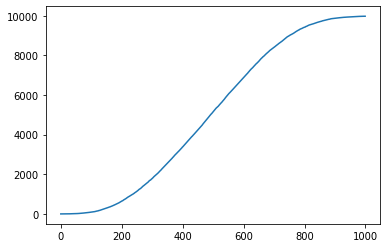

In [7]:
plt.plot(np.cumsum(Pre_status['success']))

In [9]:
pACB = {1, 2, 4, 8, 16, 32}

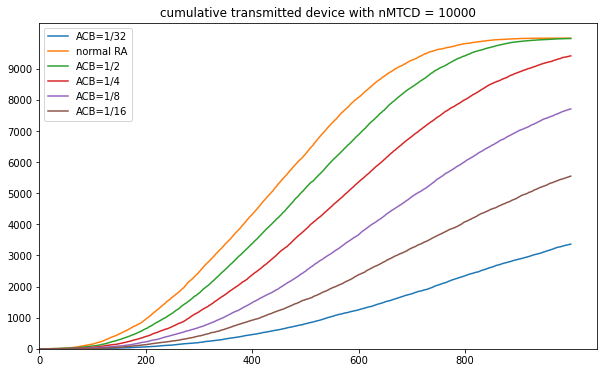

In [12]:
plt.figure(figsize=(10,6))
for p in pACB:
    Pre_status = pd.read_csv(f'ACB_{p}_Preamble_Status_10000.csv')
    if p == 1:
        plt.plot(np.cumsum(Pre_status['success']), label=f'normal RA')
    else:
        plt.plot(np.cumsum(Pre_status['success']), label=f'ACB=1/{p}')
plt.legend()
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.xticks(np.arange(0,1000,200))
plt.yticks(np.arange(0,10000,1000))
plt.grid(True, ls=':')
plt.title('cumulative transmitted device with nMTCD = 10000')
plt.grid()
plt.show()

In [39]:
RA_time_tacb = pd.read_csv(f'ACB_0.5/ACB_0.5_MTCD_RA_Time_10000.csv')
Pre_status_tacb = pd.read_csv(f'ACB_0.5/ACB_0.5_Preamble_Status_10000.csv')

RA_time_uniform = pd.read_csv(f'ACB_2/ACB_2_MTCD_RA_Time_10000.csv')
Pre_status_uniform = pd.read_csv(f'ACB_2/ACB_2_Preamble_Status_10000.csv')

Text(0.5, 1.0, 'cumulative transmitted device with nMTCD = 10000, T_acb = 4s, BI = 20ms')

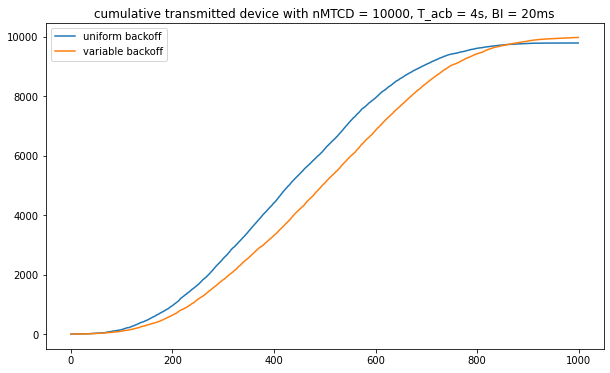

In [45]:
plt.figure(figsize=(10,6))

plt.plot(np.cumsum(Pre_status_uniform['success']), label=f'uniform backoff')
plt.plot(np.cumsum(Pre_status_tacb['success']), label=f'variable backoff')
plt.legend()
plt.title('cumulative transmitted device with nMTCD = 10000, T_acb = 4s, BI = 20ms')

In [46]:
RA_time_3 = pd.read_csv(f'ACB_0.5/ACB_0.5_MTCD_RA_Time_30000.csv')
Pre_status_3 = pd.read_csv(f'ACB_0.5/ACB_0.5_Preamble_Status_30000.csv')

In [50]:
from matplotlib.ticker import PercentFormatter

Text(0.5, 1.0, 'CDF of ACB(0.5, 4s)')

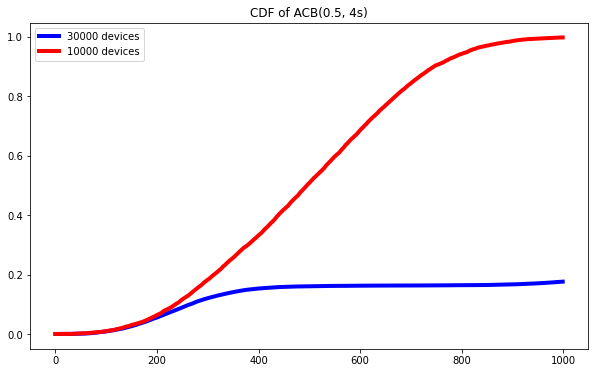

In [90]:
plt.figure(figsize=(10,6))

plt.plot(np.cumsum(Pre_status_3['success']/30000), 'b-', label=f'30000 devices')
plt.plot(np.cumsum(Pre_status_tacb['success']/10000), 'r-', label=f'10000 devices')
plt.legend()
plt.title('CDF of ACB(0.5, 4s)')

In [98]:
RAtime = pd.read_csv(f'ACB_0.5/ACB_0.5_MTCD_RA_Time_30000.csv', index_col=False)
preStatus = pd.read_csv(f'ACB_0.5/ACB_0.5_Preamble_Status_30000.csv', index_col=False)

In [126]:
x = range(2000)

Text(0.5, 1.0, 'CDF of nMTCD = 30000 with ACB(0.5, 4s)')

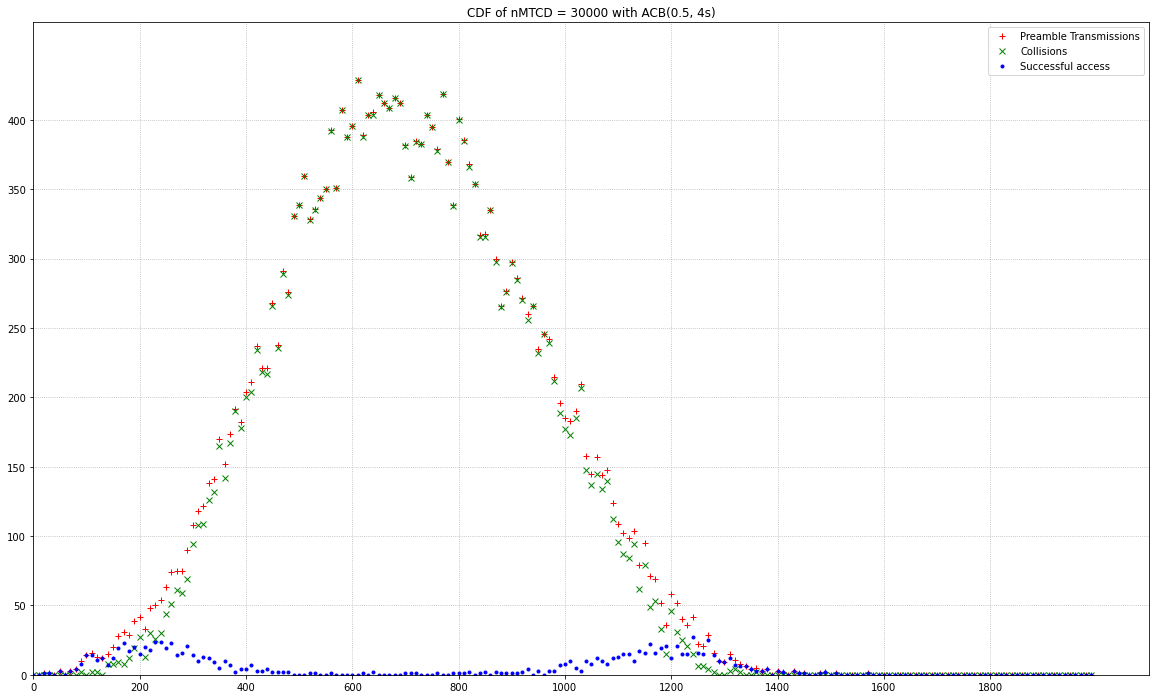

In [150]:
plt.figure(figsize=(20,12))

major_ticks = np.arange(0, 50, 2000)

plt.plot(preStatus['nRA'], label='Preamble Transmissions',marker='+', linestyle='None', markevery=10)
plt.plot(preStatus['nRA'] - preStatus['success'], label='Collisions',marker='x', linestyle='None', markevery=10)
plt.plot(preStatus['success'], label='Successful access',marker='.', linestyle='None', markevery=10)
plt.legend()
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.xticks(np.arange(0,2000,200))
plt.yticks(np.arange(0,450,50))
plt.grid(True, ls=':')
plt.title('CDF of nMTCD = 30000 with ACB(0.5, 4s)')